<a href="https://colab.research.google.com/github/lych0508/Projects/blob/main/Cohort_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bikes & Cycling Accessories Organisation's Transactions Data Based Cohort Analysis

#Introduction

##Background

Sprocket Central Pty Ltd, a medium size bikes & cycpling accessories organisation, has approach KPMG's Lighthouse & Innovation Team.
Sprocket Central Pty Ltd needs help with its customer and transactions data. The organisation has a large dataset relating to its customers, but their team is unsure how to effectively analyze it to help optimize its marketing strategy

The client provided KPMG with 3 datasets:
Customer Demographic, Customer Address, and Transaction data in the past 3 months

## Goal



1.   Finding the percentage of active customers compared to the total number of customers after each month: Customer Segmentations
2.   Interpret the retention rate



# Importing Libraries


In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lych0508","key":"5f54b96168d9144d299bff41ce19ecea"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download archit9406/customer-transaction-dataset

  0% 0.00/2.54M [00:00<?, ?B/s]
100% 2.54M/2.54M [00:00<00:00, 163MB/s]


In [ ]:
! unzip customer-transaction-dataset

Archive:  customer-transaction-dataset.zip
  inflating: KPMG_VI_New_raw_data_update_final.xlsx  


## libarary

In [ ]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

import missingno as msno
from textwrap import wrap

# Data loading and cleaning

In [ ]:
# Loading dataset
transaction_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx','Transactions')
customer_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx','NewCustomerList')
customer_demo_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx','CustomerDemographic')
customer_add_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx','CustomerAddress')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  after removing the cwd from sys.path.


In [ ]:
# View data
transaction_df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [ ]:
transaction_df.columns = transaction_df.iloc[0] #match heading to the first row
transaction_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.4,37823
19997,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560
19998,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.9,44.71,40410
19999,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216


In [ ]:
transaction_df.drop(index=transaction_df.index[0], axis=0, inplace=True) #drop first row

In [ ]:
transaction_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.4,37823
19997,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560
19998,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.9,44.71,40410
19999,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216


In [ ]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.1+ MB


In [ ]:
transaction_df.describe()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000,20000,20000,20000,19640,20000,19803,19803,19803,19803,20000.00,19803.00,19803
unique,20000,101,3494,364,2,2,6,4,3,3,296.00,103.00,100
top,1,0,2183,2017-02-14 00:00:00,True,Approved,Solex,Standard,medium,medium,2091.47,388.92,33879
freq,1,1378,14,82,9829,19821,4253,14176,13826,12990,465.00,465.00,234


## Data Cleaning - Checking and working with missing value

### Numerical Variables

In [ ]:
from os import replace
# Inspect missing values in the dataset
print(transaction_df.isnull().values.sum())
# Replace the ' 's with NaN
transaction_df = transaction_df.replace(" ",np.NaN)
# Impute the missing values with mode imputation
transaction_df['online_order'] = transaction_df['online_order'].fillna(transaction_df['online_order'].mode()[0])


1542


In [ ]:
# Impute the missing values with mean imputation
transaction_df = transaction_df.fillna(transaction_df.mean())
# Count the number of NaNs in the dataset to verify
print(transaction_df.isnull().values.sum())

788


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Here, we can see that we have 1542 null values. Which we treated with mean as well as most frequent values as per datatype. Now, as we have completed our data cleaning and understanding, now we will commence the Cohort Analysis.

In [ ]:
print(transaction_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             20000 non-null  bool   
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  float64
 11  standard_cost            20000 non-null  float64
 12  product_first_sold_date  20000 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(6)
memory usage: 2.0+ MB
None


###Catergorical Variables

In [ ]:
 transaction_df['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [ ]:
print(transaction_df.info())
for col in transaction_df.columns:
    # Check if the column is of object type
    if transaction_df[col].dtypes == 'object':
        # Impute with the most frequent value
        transaction_df[col] = transaction_df[col].fillna(transaction_df[col].value_counts().index[0])
# Count the number of NaNs in the dataset and print the counts to verify
print(transaction_df.isnull().values.sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             20000 non-null  bool   
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  float64
 11  standard_cost            20000 non-null  float64
 12  product_first_sold_date  20000 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(6)
memory usage: 2.0+ MB
None
0


# EDA



## Assigned the cohorts and calculated the monthly offset

In [ ]:
dt.datetime(transaction_df['transaction_date'][1].year, transaction_df['transaction_date'][1].month, 1)

datetime.datetime(2017, 2, 1, 0, 0)

Create a new column called "TransactionMonth" for further cohort analysis

In [ ]:
# A function that will parse the date Time based cohort:  1 day of month
def get_month(x):
  return dt.datetime(x.year, x.month, 1)
# Create transaction_date column based on month and store in TransactionMonth
transaction_df['TransactionMonth'] = transaction_df['transaction_date'].apply(get_month)
transaction_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransactionMonth
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-01
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-01
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-01
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-01
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,2017-06-01
19997,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,2017-11-01
19998,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,2017-04-01
19999,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,2017-07-01


Since there is no register date information, we assume that the first transaction month as registar(cohort) month

In [ ]:
transaction_df.groupby('customer_id')['TransactionMonth'].transform('min')

1       2017-02-01
2       2017-01-01
3       2017-01-01
4       2017-02-01
5       2017-01-01
           ...    
19996   2017-01-01
19997   2017-01-01
19998   2017-04-01
19999   2017-02-01
20000   2017-03-01
Name: TransactionMonth, Length: 20000, dtype: datetime64[ns]

In [ ]:
# Grouping by customer_id and select the InvoiceMonth value
grouping = transaction_df.groupby('customer_id')['TransactionMonth']
# Assigning a minimum InvoiceMonth value to the dataset
transaction_df['CohortMonth'] = grouping.transform('min')
# printing top 5 rows
transaction_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransactionMonth,CohortMonth
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-01,2017-02-01
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-01,2017-01-01
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-01,2017-01-01
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-01,2017-02-01
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,2017-01-01


In [ ]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  bool          
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

## Calculating time offset in Month as Cohort Index

Calculating the time offset for each transaction allows you to evaluate the metrics for each cohort in a comparable fashion.

First, we will create 6 variables that capture the integer value of years, months, and days for Transaction and Cohort Date using the get_date_int() function.

In [ ]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day
# Getting the integers for date parts from the `InvoiceDay` column
transcation_year, transaction_month, _ = get_date_int(transaction_df, 'TransactionMonth')
# Getting the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, _ = get_date_int(transaction_df, 'CohortMonth')

Now we will calculate the difference between the Invoice Dates and Cohort dates in years, months separately. then calculate the total Months difference between the two. This will be our month’s offset or cohort Index, which we will use in the next section to calculate the retention rate.

In [ ]:
#  Get the  difference in years
years_diff = transcation_year - cohort_year
# Calculate difference in months
months_diff = transaction_month - cohort_month
""" Extract the difference in months from all previous values
 "+1" in addeded at the end so that first month is marked as 1 instead of 0 for easier interpretation.
 """
transaction_df['CohortIndex'] = years_diff * 12 + months_diff  + 1
transaction_df.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransactionMonth,CohortMonth,CohortIndex
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-01,2017-02-01,1
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-01,2017-01-01,5
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-01,2017-01-01,10
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-01,2017-02-01,7
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,2017-01-01,10



Here, at first, we create a group() object with CohortMonth and CohortIndex and store it as a grouping.

Then, we call this object, select the customer_id column and calculate the average.

Then we store the results as cohort_data. Then, we reset the index before calling the pivot function to be able to access the columns now stored as indices.

Finally, we create a pivot table bypassing

 -  CohortMonth to the index parameter,
 - CohortIndex to the columns parameter,
 - customer_id to the values parameter.

In [ ]:
# Counting daily active user from each chort
# Counting number of unique customer Id's falling in each group of CohortMonth and CohortIndex
cohort_data = transaction_df.groupby(['CohortMonth', 'CohortIndex']).nunique()['customer_id'].reset_index()
# Printing top 5 rows of Dataframe
cohort_data.head()

,CohortMonth,CohortIndex,customer_id
0,2017-01-01,1,1354
1,2017-01-01,2,486
2,2017-01-01,3,508
3,2017-01-01,4,509
4,2017-01-01,5,502


# Calculate business metrics: Retention rate

**The percentage of active customers compared to the total number of customers after a specific time interval is called retention rate.**

In this section, we will calculate the retention count for each cohort Month paired with cohort Index

Now that we have a count of the retained customers for each cohortMonth and cohortIndex. We will calculate the retention rate for each Cohort.

We will create a pivot table for this purpose.

In [ ]:
cohort_data.pivot(index='CohortMonth',  columns ='CohortIndex', values = 'customer_id')

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,1354.0,486.0,508.0,509.0,502.0,483.0,518.0,529.0,500.0,531.0,497.0,516.0
2017-02-01,800.0,325.0,298.0,313.0,288.0,298.0,308.0,281.0,329.0,308.0,296.0,NaN
2017-03-01,484.0,167.0,174.0,167.0,182.0,184.0,172.0,212.0,189.0,181.0,NaN,NaN
2017-04-01,336.0,111.0,121.0,153.0,143.0,121.0,142.0,126.0,132.0,NaN,NaN,NaN
2017-05-01,210.0,85.0,81.0,87.0,71.0,74.0,73.0,81.0,NaN,NaN,NaN,NaN
2017-06-01,122.0,45.0,44.0,47.0,46.0,46.0,53.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,77.0,26.0,29.0,32.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,51.0,19.0,21.0,17.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,23.0,7.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cohort_counts = cohort_data.pivot(index='CohortMonth',  columns ='CohortIndex', values = 'customer_id')
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
# Coverting the retention rate into percentage and Rounding off.
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,100.0,35.9,37.5,37.6,37.1,35.7,38.3,39.1,36.9,39.2,36.7,38.1
2017-02-01,100.0,40.6,37.2,39.1,36.0,37.2,38.5,35.1,41.1,38.5,37.0,NaN
2017-03-01,100.0,34.5,36.0,34.5,37.6,38.0,35.5,43.8,39.0,37.4,NaN,NaN
2017-04-01,100.0,33.0,36.0,45.5,42.6,36.0,42.3,37.5,39.3,NaN,NaN,NaN
2017-05-01,100.0,40.5,38.6,41.4,33.8,35.2,34.8,38.6,NaN,NaN,NaN,NaN
2017-06-01,100.0,36.9,36.1,38.5,37.7,37.7,43.4,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,33.8,37.7,41.6,48.1,31.2,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,37.3,41.2,33.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,30.4,30.4,39.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The retention rate dataframe represents Customer retained across Cohorts. We can read it as follows:

Index value represents the Cohort
Columns represent the number of months since the current Cohort
For instance: The value at CohortMonth 2017-01-01, CohortIndex 3 is 35.9 and represents 35.9% of customers from cohort 2017-01 were retained in the 3rd Month.
Also, you can see from the retention Rate DataFrame:

- Retention Rate 1st index i.e 1st month is 100% as all the customers for that particular customer signed up in 1st Month
- The retention rate may increase or decrease in subsequent Indexes.
- Values towards the bottom right have a lot of NaN values.

#Visualizing the retention rate
Before we starting plotting our heatmap, let’s set the index of our Retention rate dataframe to a more readable string format.

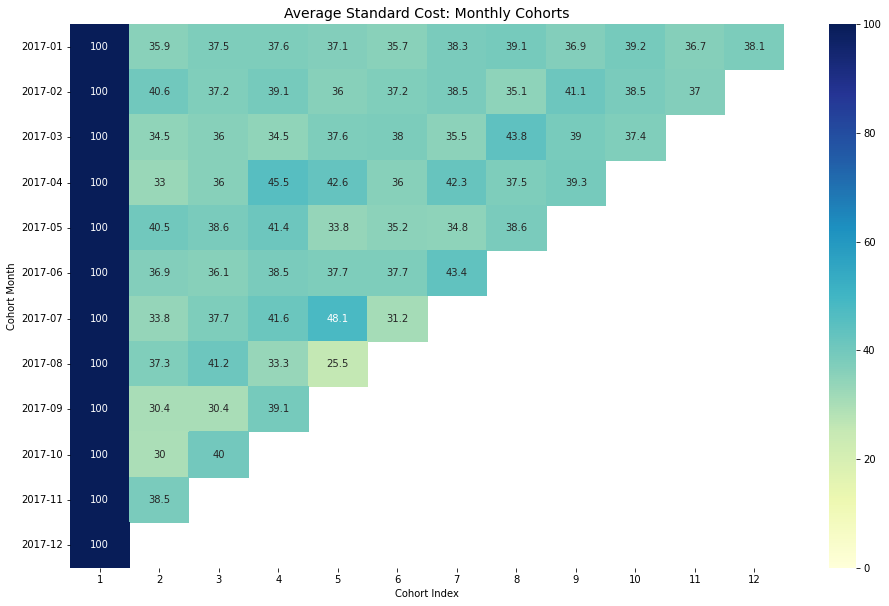

In [ ]:
retention = retention.round(3)*100
retention.index = retention.index.strftime('%Y-%m')
# Initialize the figure
plt.figure(figsize=(16, 10))
# Adding a title
plt.title('Average Standard Cost: Monthly Cohorts', fontsize = 14)
# Creating the heatmap
sns.heatmap(retention, annot = True,vmin = 0.0, vmax =100, cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()

# Interpreting the retention rate
The most effective way to visualize and analyze cohort analysis data is through a heatmap, as we did above. It provides both the actual metric values and the color-coding to see the differences in the numbers visually.



1.   product life - the number of users who make an order on the 1st month decreases significantly.
2.   retention rate drop more than 60% after the 1st month


I will suggest the product team to check the following reasons may cause this decrease:


1.  Time

*   Internal - data source?data collection?bug
*   External - seasonality? Industry trend? Competitors? Special event?

2.	Other product/feature by the same company

*   Have we made any change to our product line
*   Have other related products experienced the same change?








# Find customer id who place an order on 1st month then left on the second month

In [ ]:
transaction_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransactionMonth,CohortMonth,CohortIndex
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-01,2017-02-01,1
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-01,2017-01-01,5
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-01,2017-01-01,10
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-01,2017-02-01,7
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,2017-01-01,10


In [ ]:
cohortindex1 = transaction_df[transaction_df['CohortIndex']==1]
#cohortindex1.customer_id.nunique()
cohortindex1.info()
#cohortindex1.customer_id.unique()
#cohortindex1['CohortIndex'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4398 entries, 1 to 19998
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           4398 non-null   int64         
 1   product_id               4398 non-null   int64         
 2   customer_id              4398 non-null   int64         
 3   transaction_date         4398 non-null   datetime64[ns]
 4   online_order             4398 non-null   bool          
 5   order_status             4398 non-null   object        
 6   brand                    4398 non-null   object        
 7   product_line             4398 non-null   object        
 8   product_class            4398 non-null   object        
 9   product_size             4398 non-null   object        
 10  list_price               4398 non-null   float64       
 11  standard_cost            4398 non-null   float64       
 12  product_first_sold_date  4398 non

In [ ]:
cohortindex2 = transaction_df[transaction_df['CohortIndex']==2]
#cohortindex2.customer_id.nunique()

In [ ]:
#df_all = cohortindex1.merge(cohortindex2.drop_duplicates(), on=['CohortIndex'],                   how='left', indicator=True)
#df_all

In [ ]:
#a=cohortindex1.groupby(['customer_id']).sum()
#a['CohortIndex'].value_counts()

In [ ]:
common = cohortindex1.merge(cohortindex2,on=['customer_id'])
#print(common)
left = cohortindex1[(~cohortindex1.customer_id.isin(common.customer_id))]
left.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2803 entries, 1 to 19998
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           2803 non-null   int64         
 1   product_id               2803 non-null   int64         
 2   customer_id              2803 non-null   int64         
 3   transaction_date         2803 non-null   datetime64[ns]
 4   online_order             2803 non-null   bool          
 5   order_status             2803 non-null   object        
 6   brand                    2803 non-null   object        
 7   product_line             2803 non-null   object        
 8   product_class            2803 non-null   object        
 9   product_size             2803 non-null   object        
 10  list_price               2803 non-null   float64       
 11  standard_cost            2803 non-null   float64       
 12  product_first_sold_date  2803 non

In [ ]:
#left.groupby(['customer_id']).sum().reset_index()

#Prepare the demographic dataframe


In [ ]:
customer_demo_df.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,34,Jephthah Bachmann,U,59,1843-12-21,NaN,Legal Assistant,IT,Affluent Customer,N,No,20.0
1,144,Jory Barrabeale,U,71,NaT,120.0,Environmental Tech,IT,Mass Customer,N,No,NaN
2,168,Reggie Broggetti,U,8,NaT,120.0,General Manager,IT,Affluent Customer,N,Yes,NaN
3,267,Edgar Buckler,U,53,NaT,120.0,NaN,IT,High Net Worth,N,No,NaN
4,290,Giorgio Kevane,U,42,NaT,120.0,Senior Sales Associate,IT,Mass Customer,N,No,NaN


In [ ]:
customer_demo_df.loc[0, 'DOB'] = customer_demo_df.loc[0, 'DOB'].replace(year=1943)
customer_demo_df.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,34,Jephthah Bachmann,U,59,1943-12-21,NaN,Legal Assistant,IT,Affluent Customer,N,No,20.0
1,144,Jory Barrabeale,U,71,NaT,120.0,Environmental Tech,IT,Mass Customer,N,No,NaN
2,168,Reggie Broggetti,U,8,NaT,120.0,General Manager,IT,Affluent Customer,N,Yes,NaN
3,267,Edgar Buckler,U,53,NaT,120.0,NaN,IT,High Net Worth,N,No,NaN
4,290,Giorgio Kevane,U,42,NaT,120.0,Senior Sales Associate,IT,Mass Customer,N,No,NaN


In [ ]:
customer_demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   name                                 4000 non-null   object        
 2   gender                               4000 non-null   object        
 3   past_3_years_bike_related_purchases  4000 non-null   int64         
 4   DOB                                  3913 non-null   datetime64[ns]
 5   age                                  3999 non-null   float64       
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [ ]:
customer_demo_df.describe()

,customer_id,past_3_years_bike_related_purchases,age,tenure
count,4000.000000,4000.000000,3999.000000,3913.000000
mean,2000.500000,48.890000,44.054514,10.657041
std,1154.844867,28.715005,16.858429,5.660146
min,1.000000,0.000000,18.000000,1.000000
25%,1000.750000,24.000000,33.000000,6.000000
50%,2000.500000,48.000000,43.000000,11.000000
75%,3000.250000,73.000000,53.000000,15.000000
max,4000.000000,99.000000,120.000000,22.000000


##Data Cleaning

In [ ]:
customer_demo_df[customer_demo_df.age ==120.0]



,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
1,144,Jory Barrabeale,U,71,NaT,120.0,Environmental Tech,IT,Mass Customer,N,No,NaN
2,168,Reggie Broggetti,U,8,NaT,120.0,General Manager,IT,Affluent Customer,N,Yes,NaN
3,267,Edgar Buckler,U,53,NaT,120.0,NaN,IT,High Net Worth,N,No,NaN
4,290,Giorgio Kevane,U,42,NaT,120.0,Senior Sales Associate,IT,Mass Customer,N,No,NaN
5,451,Marlow Flowerdew,U,37,NaT,120.0,Quality Control Specialist,IT,High Net Worth,N,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
83,3779,Ulick Daspar,U,68,NaT,120.0,NaN,IT,Affluent Customer,N,No,NaN
84,3883,Nissa Conrad,U,35,NaT,120.0,Legal Assistant,IT,Mass Customer,N,No,NaN
85,3931,Kylie Epine,U,19,NaT,120.0,NaN,IT,High Net Worth,N,Yes,NaN
86,3935,Teodor Alfonsini,U,72,NaT,120.0,NaN,IT,High Net Worth,N,Yes,NaN


since the the max value of age is due to the missing value of DOB, I will replace the max value of age with NaN first

In [ ]:
customer_demo_df['age']= customer_demo_df['age'].replace(120.0,np.NaN)
customer_demo_df['age'] = customer_demo_df['age'].fillna(customer_demo_df['age'].mean())


In [ ]:
customer_demo_df.describe()

,customer_id,past_3_years_bike_related_purchases,age,tenure
count,4000.000000,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,42.365542,10.657041
std,1154.844867,28.715005,12.484622,5.660146
min,1.000000,0.000000,18.000000,1.000000
25%,1000.750000,24.000000,33.000000,6.000000
50%,2000.500000,48.000000,42.365542,11.000000
75%,3000.250000,73.000000,52.000000,15.000000
max,4000.000000,99.000000,88.000000,22.000000


In [ ]:
# Inspect missing values in the dataset
print(customer_demo_df.isnull().values.sum())
# Replace the ' 's with NaN
customer_demo_df = customer_demo_df.replace(" ",np.NaN)
# Impute the missing values with mean imputation
customer_demo_df = customer_demo_df.fillna(customer_demo_df.mean())
# Count the number of NaNs in the dataset to verify
print(customer_demo_df.isnull().values.sum())

1336
1249


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
customer_demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   name                                 4000 non-null   object        
 2   gender                               4000 non-null   object        
 3   past_3_years_bike_related_purchases  4000 non-null   int64         
 4   DOB                                  3913 non-null   datetime64[ns]
 5   age                                  4000 non-null   float64       
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [ ]:
#print(transaction_df.info())
for col in customer_demo_df.columns:
    # Check if the column is of object type
    if customer_demo_df[col].dtypes == 'object':
        # Impute with the most frequent value
        customer_demo_df[col] = customer_demo_df[col].fillna(customer_demo_df[col].value_counts().index[0])
# Count the number of NaNs in the dataset and print the counts to verify
print(customer_demo_df.isnull().values.sum())

87


In [ ]:
customer_demo_df['owns_car']= customer_demo_df['owns_car'].map({'Yes': '1', 'No': '0'})
customer_demo_df.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,34,Jephthah Bachmann,U,59,1943-12-21,42.365542,Legal Assistant,IT,Affluent Customer,N,0,20.000000
1,144,Jory Barrabeale,U,71,NaT,42.365542,Environmental Tech,IT,Mass Customer,N,0,10.657041
2,168,Reggie Broggetti,U,8,NaT,42.365542,General Manager,IT,Affluent Customer,N,1,10.657041
3,267,Edgar Buckler,U,53,NaT,42.365542,Business Systems Development Analyst,IT,High Net Worth,N,0,10.657041
4,290,Giorgio Kevane,U,42,NaT,42.365542,Senior Sales Associate,IT,Mass Customer,N,0,10.657041


#Prepare for address dataframe

In [ ]:
customer_add_df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4


In [ ]:
customer_add_df.columns = customer_add_df.iloc[0]
customer_add_df.drop(index=customer_add_df.index[0], axis=0, inplace=True) #drop first row
customer_add_df.head()

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9


In [ ]:
customer_add_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 3999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   object
 1   address             3999 non-null   object
 2   postcode            3999 non-null   object
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   object
dtypes: object(6)
memory usage: 218.7+ KB


In [ ]:
customer_add_df.describe()

,customer_id,address,postcode,state,country,property_valuation
count,3999,3999,3999,3999,3999,3999
unique,3999,3996,873,5,1,12
top,1,3 Mariners Cove Terrace,2170,NSW,Australia,9
freq,1,2,31,2054,3999,647


In [ ]:
customer_add_df['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [ ]:
customer_add_df['state'] = customer_add_df['state'].replace('Victoria','VIC')
customer_add_df['state'] = customer_add_df['state'].replace('New South Wales', 'NSW')
customer_add_df['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

#Prepare of the potential customers dataframe

In [ ]:
customer_df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.43,0.5375,0.671875,0.571094,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.58,0.5800,0.725000,0.616250,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.73,0.7300,0.730000,0.730000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.80,1.0000,1.000000,1.000000,4.0,4,1.703125


In [ ]:
customer_df.columns = customer_df.iloc[0]
customer_df.drop(index=customer_df.index[0], axis=0, inplace=True) #drop first row
customer_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.43,0.5375,0.671875,0.571094,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.58,0.5800,0.725000,0.616250,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.73,0.7300,0.730000,0.730000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.80,1.0000,1.000000,1.000000,4.0,4,1.703125
5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.80,0.8000,1.000000,1.000000,4.0,4,1.703125


In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   object 
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   object 
 11  address                       

In [ ]:

customer_df=customer_df[customer_df.columns.dropna()]
#customer_df.info()

In [ ]:
customer_df['property_valuation'].value_counts()

9     173
8     161
7     136
10    116
6      69
11     61
5      57
4      53
3      51
12     46
2      42
1      30
7       2
11      1
8       1
6       1
Name: property_valuation, dtype: int64

In [ ]:
customer_df.replace({'property_valuation':{"6":6, "7":7, "8":8, "11":11}}, inplace=True)

# Segmentation analysis for Users left after 1st month

##Merge tables

In [ ]:
#cust_df = pd.merge(pd.merge(transaction_df,customer_demo_df,on='customer_id'),customer_add_df,on='customer_id').drop_duplicates()
cust_df1= left.merge(customer_demo_df, how='inner', on='customer_id')
cust_df2 = cust_df1.merge(customer_add_df, how='inner', on='customer_id')
cust_df2.head()
#df1.merge(df2, how='inner', on='a')

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,Financial Services,Mass Customer,N,1,10.0,984 Hoepker Court,3064,VIC,Australia,6
1,11,5,1986,2017-01-17,False,Approved,Trek Bicycles,Mountain,low,medium,...,Retail,Mass Customer,N,0,16.0,366 International Way,2170,NSW,Australia,8
2,18624,89,1986,2017-01-15,True,Approved,WeareA2B,Touring,medium,large,...,Retail,Mass Customer,N,0,16.0,366 International Way,2170,NSW,Australia,8
3,20,25,3002,2017-01-28,True,Approved,Giant Bicycles,Road,medium,medium,...,Financial Services,Mass Customer,N,1,16.0,673 Comanche Parkway,2470,NSW,Australia,2
4,4243,69,3002,2017-01-06,True,Approved,Giant Bicycles,Road,medium,medium,...,Financial Services,Mass Customer,N,1,16.0,673 Comanche Parkway,2470,NSW,Australia,2


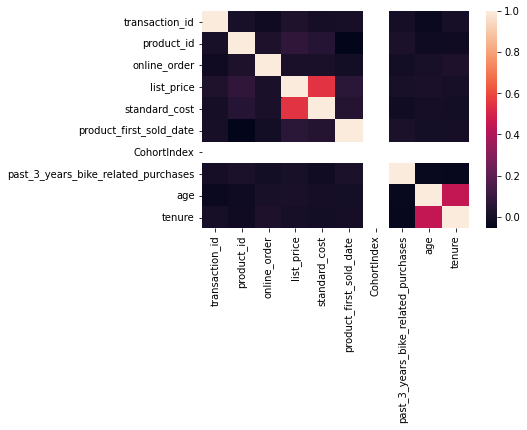

In [ ]:
sns.heatmap(data=cust_df2.corr())

##Create some new columns for future analysis

In [ ]:
cust_df2['average_product_cost'] = transaction_df.groupby('customer_id').mean() ['list_price']
cust_df2['number_of_orders'] = transaction_df.groupby('customer_id').count() ['transaction_date']
cust_df2['total_spent'] = transaction_df.groupby('customer_id').sum() ['list_price']
cust_df2['profit'] = transaction_df.groupby('customer_id').sum() ['list_price'] - transaction_df.groupby('customer_id').sum() ['standard_cost']

In [ ]:
#age group
now = pd.Timestamp('now')
cust_df2['age'] = (now - cust_df2['DOB']).astype('<m8[Y]')
def cohort(age):
    if age < 30:
        return 'Under 30'
    elif age <= 40:
        return '30-39'
    elif age <= 50:
        return '40-49'
    elif age < 60:
        return '50-59'
    else:
        return "60+"

cust_df2['age_group'] = cust_df2['age'].apply(cohort)

In [ ]:
#cust_df2.dropna(axis=0, inplace=True)

##Analysis

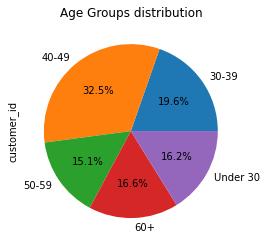

In [ ]:
#Age group by states
#fig = plt.figure(figsize=(6,4))
age_group_fig = cust_df2.groupby(['age_group'])['customer_id'].count()
age_group_fig.plot.pie(autopct="%.1f%%")
plt.title('Age Groups distribution')
plt.show()
#sns.countplot(data=cust_df2, x='age_group')


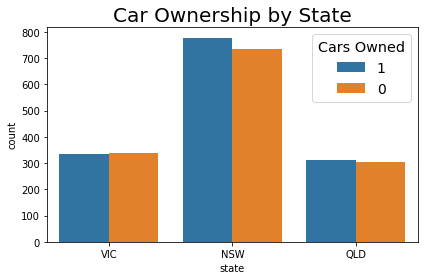

In [ ]:
## car own by state
plt.figure(figsize=(6,4), tight_layout=True)
sns.countplot(data=cust_df2,x='state', hue='owns_car')
plt.set_cmap('winter')
plt.title('Car Ownership by State', fontsize=20) ;
plt.legend(fontsize=14, frameon=True, title_fontsize='x-large',title='Cars Owned')
plt.savefig('Car Ownership by State.jpeg')

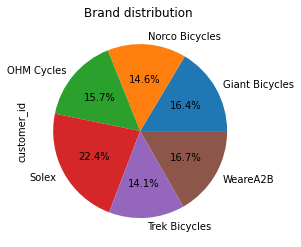

In [ ]:
df_plot = cust_df2.groupby(['brand'])['customer_id'].count()
df_plot.plot.pie(autopct="%.1f%%")
plt.title('Brand distribution ');

In [ ]:
#brands by product size
#df_plot = cust_df2.groupby(['brand', 'product_size']).size().reset_index().pivot(columns='product_size', index='brand', values=0)
#plt.figure(figsize=(14,12), tight_layout=True)

#df_plot.plot(kind='bar', stacked=True,cmap='winter')
#plt.legend(frameon=True, title= 'Product Size')
#plt.title('Brands by Product Size', fontsize='x-large')
#plt.xticks(rotation=45)
#plt.xlabel('')

#plt.savefig('Brands by Product Size.jpeg',bbox_inches="tight");

In [ ]:
#past three year purchase
def history(past_3_years_bike_related_purchases):
    if past_3_years_bike_related_purchases <= 20:
        return 'Under 20'
    elif past_3_years_bike_related_purchases <= 40:
        return '20-39'
    elif past_3_years_bike_related_purchases <= 60:
        return '40-59'
    elif past_3_years_bike_related_purchases < 80:
        return '60-79'
    else:
        return "80+"
cust_df2['related_purchase_group'] = cust_df2['past_3_years_bike_related_purchases'].apply(history)

##Profit

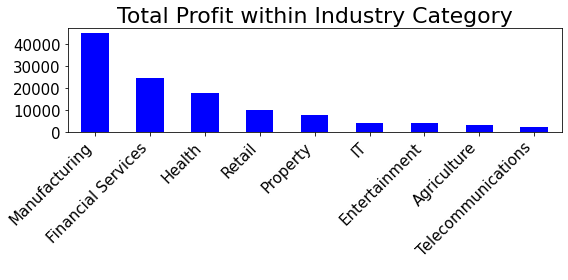

In [ ]:
#Total Profit within Industry Category
industry_profit =cust_df2.groupby('job_industry_category').sum().sort_values('profit',ascending=False).iloc[:,8]
#industry_profit.drop('Unknown',axis=0,inplace=True)
plt.figure(figsize=(8,4), tight_layout=True)
fig = industry_profit.plot(kind='bar', cmap='winter', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.xlabel(' ')
plt.title('Total Profit within Industry Category', fontsize=22)
plt.savefig('Total Profit within Industry Category.jpeg');

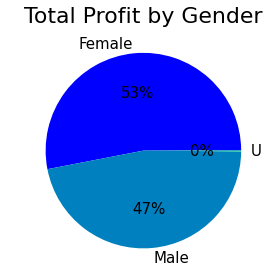

In [ ]:
#total profit by gender
gender_profit =cust_df2.groupby('gender').sum().sort_values('profit',ascending=False).iloc[:,8]
plt.figure(figsize=(4,4), tight_layout=True)
fig = gender_profit.plot(kind='pie', cmap='winter', fontsize=15,autopct='%.0f%%')
plt.xticks(rotation=45)
plt.ylabel(' ')
plt.title('Total Profit by Gender', fontsize=22) ;
plt.savefig('Total Profit by Gender.jpeg')

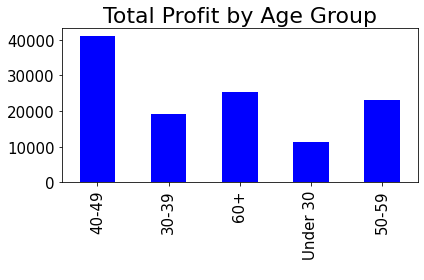

In [ ]:
#total profit by age group
age_group_profit =cust_df2.groupby('age_group').sum().sort_values('profit',ascending=False).iloc[:,8]
plt.figure(figsize=(6,4), tight_layout=True)
fig = age_group_profit.plot(kind='bar', cmap='winter', fontsize=15)
plt.xlabel(' ')
plt.title('Total Profit by Age Group', fontsize=22) ;
plt.savefig('Total Profit by Age Group.jpeg')

#Segmentation by users still make orders after 1st month

In [ ]:
retention1=cohortindex2.merge(customer_demo_df, how='inner', on='customer_id')
retention2 = retention1.merge(customer_add_df, how='inner', on='customer_id')
retention2.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,6,25,2339,2017-03-08,True,Approved,Giant Bicycles,Road,medium,medium,...,Property,Affluent Customer,N,1,16.000000,7174 Thackeray Point,2153,NSW,Australia,10
1,13,35,1243,2017-02-26,True,Approved,Trek Bicycles,Standard,low,medium,...,Retail,Mass Customer,N,0,8.000000,2 Eliot Lane,2155,NSW,Australia,11
2,11800,98,1243,2017-02-15,False,Approved,Trek Bicycles,Standard,high,medium,...,Retail,Mass Customer,N,0,8.000000,2 Eliot Lane,2155,NSW,Australia,11
3,19002,25,1243,2017-02-08,False,Approved,Giant Bicycles,Road,medium,medium,...,Retail,Mass Customer,N,0,8.000000,2 Eliot Lane,2155,NSW,Australia,11
4,17,79,2426,2017-04-03,False,Approved,Norco Bicycles,Standard,medium,medium,...,IT,Affluent Customer,N,1,10.657041,4 Becker Center,2145,NSW,Australia,10


In [ ]:
retention2['average_product_cost'] = transaction_df.groupby('customer_id').mean() ['list_price']
retention2['number_of_orders'] = transaction_df.groupby('customer_id').count() ['transaction_date']
retention2['total_spent'] = transaction_df.groupby('customer_id').sum() ['list_price']
retention2['profit'] = transaction_df.groupby('customer_id').sum() ['list_price'] - transaction_df.groupby('customer_id').sum() ['standard_cost']

In [ ]:
#age group
now = pd.Timestamp('now')
retention2['age'] = (now - retention2['DOB']).astype('<m8[Y]')
def cohort(age):
    if age < 30:
        return 'Under 30'
    elif age <= 40:
        return '30-39'
    elif age <= 50:
        return '40-49'
    elif age < 60:
        return '50-59'
    else:
        return "60+"

retention2['age_group'] = retention2['age'].apply(cohort)

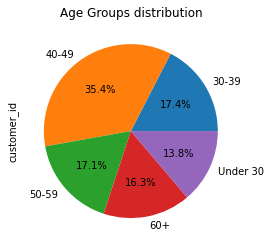

In [ ]:
#Age group by states
#fig = plt.figure(figsize=(8,4))
age_group_fig2 = retention2.groupby(['age_group'])['customer_id'].count()
age_group_fig2.plot.pie(autopct="%.1f%%")
plt.title('Age Groups distribution')
plt.show()

#sns.countplot(data=retention2, x='age_group', hue='state')


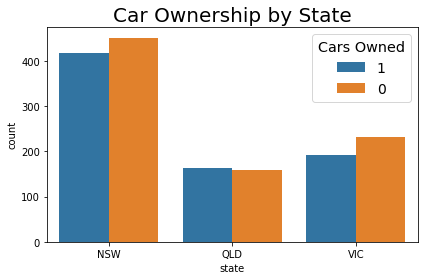

In [ ]:
# car own by state
plt.figure(figsize=(6,4), tight_layout=True)
sns.countplot(data=retention2,x='state', hue='owns_car')
plt.set_cmap('winter')
plt.title('Car Ownership by State', fontsize=20) ;
plt.legend(fontsize=14, frameon=True, title_fontsize='x-large',title='Cars Owned')
plt.savefig('Car Ownership by State2.jpeg')

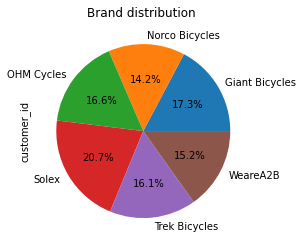

In [ ]:
#brands by product size
df_plot2 = retention2.groupby(['brand'])['customer_id'].count()
df_plot2.plot.pie(autopct="%.1f%%")
plt.title('Brand distribution ');

#df_plot = retention2.groupby(['brand', 'product_size']).size().reset_index().pivot(columns='product_size', index='brand', values=0)

#plt.figure(figsize=(14,12), tight_layout=True)

#df_plot.plot(kind='bar', stacked=True,cmap='winter')
#plt.legend(frameon=True, title= 'Product Size')
#plt.title('Brands by Product Size', fontsize='x-large')
#plt.xticks(rotation=45)
#plt.xlabel('')

#plt.savefig('Brands by Product Size2.jpeg',bbox_inches="tight");

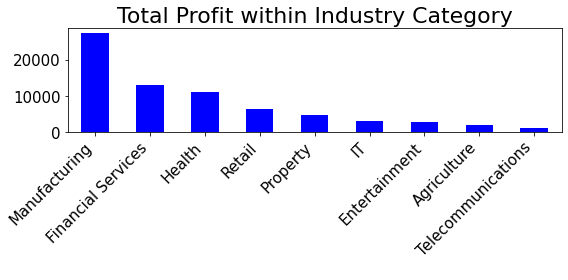

In [ ]:
#Total Profit within Industry Category
industry_profit =retention2.groupby('job_industry_category').sum().sort_values('profit',ascending=False).iloc[:,8]
#industry_profit.drop('Unknown',axis=0,inplace=True)
plt.figure(figsize=(8,4), tight_layout=True)
fig = industry_profit.plot(kind='bar', cmap='winter', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.xlabel(' ')
plt.title('Total Profit within Industry Category', fontsize=22)
plt.savefig('Total Profit within Industry Category2.jpeg');

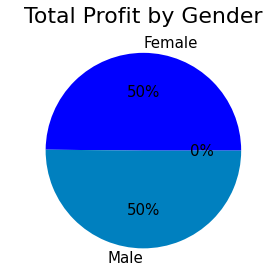

In [ ]:
#total profit by gender
gender_profit =retention2.groupby('gender').sum().sort_values('profit',ascending=False).iloc[:,8]
plt.figure(figsize=(4,4), tight_layout=True)
fig = gender_profit.plot(kind='pie', cmap='winter', fontsize=15,autopct='%.0f%%')
plt.xticks(rotation=45)
plt.ylabel(' ')
plt.title('Total Profit by Gender', fontsize=22) ;
plt.savefig('Total Profit by Gender2.jpeg')

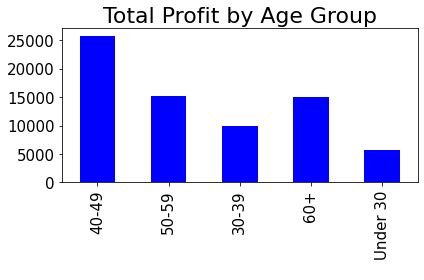

In [ ]:
#total profit by age group
age_group_profit =retention2.groupby('age_group').sum().sort_values('profit',ascending=False).iloc[:,8]
plt.figure(figsize=(6,4), tight_layout=True)
fig = age_group_profit.plot(kind='bar', cmap='winter', fontsize=15)
plt.xlabel(' ')
plt.title('Total Profit by Age Group', fontsize=22) ;
plt.savefig('Total Profit by Age Group.jpeg')

#Insight



*   Age distribution - Among users who left after first month, more than 35% are under 40 yeras old. For the users who keep making transactions after first month, around 20% are under 40 years old. This is maybe users under 40 years old are not very interested in Sprocket Central Pty Ltd's products.
*   Brand distribution - Most pepole choose the Solex and Giant Bicycles. Besides that，the top third brand which users who left after first month choose is  weare2 while the top third brand which users who keep making transactions after first month is OHM Cycles. Product team could develop related strategies for these two products
*   State with car distribution - For users who left after first month，users with or without car are approximately equally among each states. For the users who keep making transactions after first month, there are more users who don't have cars in NSW and VIC. They may become the target market in the future.
*   Total profit from industry - Top 3 profit are generated from manufacturing, Financial service, and health industry. However, in the manufacturing and financial service industries, users who left after first month generates more profit than the users who keep making transactions after first month. Therefore, Sprocket Central Pty Ltd needs to brain storm some marketing strategies to attract these group of people
*   Total profit by age - most profit are generated by above 40 years old user. However, users who left after first month generate more profit than users who keep making transactions after first month










